In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [25]:
housing = fetch_california_housing()

In [26]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [27]:
X = housing.data
y = housing.target

In [28]:
df = pd.DataFrame(X,columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [30]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [31]:
df.shape

(20640, 8)

In [32]:
df = df.drop(labels=['Latitude','Longitude'],axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [37]:
X_train_full,X_test,y_train_full,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [42]:
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.3,random_state=42)

In [46]:
print(X_train_full.shape)
print(X_train.shape)
print(y_train_full.shape)
print(X_train.shape)

(16512, 6)
(11558, 6)
(16512,)
(11558, 6)


In [49]:
Layers = [
    tf.keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

In [50]:
model = tf.keras.models.Sequential(Layers)

In [51]:
LOSS = "mse"
OPTIMIZER  = "sgd"
model.compile(optimizer=OPTIMIZER,loss=LOSS)

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [54]:
EPOCHS = 20

In [57]:
training = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_val,y_val))

Epoch 1/20


362/362 [==============================] - 1s 2ms/step - loss: 0.4186 - val_loss: 0.4459
Epoch 2/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4367 - val_loss: 0.4423
Epoch 3/20
362/362 [==============================] - 0s 1ms/step - loss: 0.4284 - val_loss: 0.4239
Epoch 4/20
362/362 [==============================] - 0s 1ms/step - loss: 0.4225 - val_loss: 0.4151
Epoch 5/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4213 - val_loss: 0.4457
Epoch 6/20
362/362 [==============================] - 1s 3ms/step - loss: 0.4197 - val_loss: 0.4161
Epoch 7/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4323
Epoch 8/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4179 - val_loss: 0.4189
Epoch 9/20
362/362 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.4143
Epoch 10/20
362/362 [==============================] - 0s 1ms/step - loss: 0.4162 - val_loss: 0.4556
Epoch 11/2

In [58]:
pd.DataFrame(training.history)

,loss,val_loss
0,0.418587,0.445899
1,0.436681,0.442333
2,0.428361,0.423904
3,0.422478,0.415096
4,0.421254,0.445652
5,0.419656,0.416140
6,0.417805,0.432318
7,0.417874,0.418888
8,0.416924,0.414304
9,0.416224,0.455555


In [59]:
training.params

{'verbose': 1, 'epochs': 20, 'steps': 362}

<Axes: >

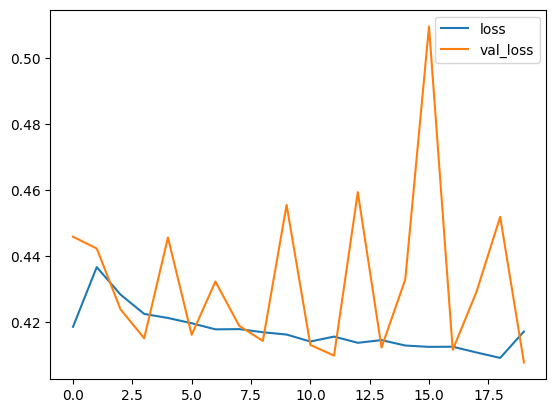

In [64]:
pd.DataFrame(training.history).plot()

In [65]:
model.evaluate(X_test,y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.4214


0.4213889241218567

In [66]:
X_test.shape

(4128, 6)

In [73]:
sample = X_test[0]
sample.shape

(6,)

**There should always be a dimension for the sample when sending to nn**

In [75]:
sample.reshape((1,6)).shape

(1, 6)

In [78]:
model.predict(sample.reshape((1,6)))

1/1 [==============================] - 0s 25ms/step


array([[0.9402286]], dtype=float32)

In [82]:
model_2 = tf.keras.models.Sequential(Layers)
LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_2.compile(optimizer=OPTIMIZER,loss=LOSS)
EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model.h5',save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
tensor_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb,early_stopping_cb,tensor_cb]

training_2 = model_2.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_val,y_val),callbacks=CALLBACKS)

Epoch 1/20
362/362 [==============================] - 2s 3ms/step - loss: 0.4014 - val_loss: 0.4053
Epoch 2/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4014 - val_loss: 0.4053
Epoch 3/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.4051
Epoch 4/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4011 - val_loss: 0.4059
Epoch 5/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.4052
Epoch 6/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.4063
Epoch 7/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.4062
Epoch 8/20
362/362 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.4057


In [83]:
%reload_ext tensorboard

In [87]:
!python -m pip install grpcio
!python -m pip install grpcio-tools


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.1 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 13.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.7 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.7 MB 24.1 MB/s eta 0:00:01
   ------------------ --------------------- 1.8/3.7 MB 22.3 MB/s eta 0:00:01
   ---------------------------- ----------- 2.7/3.7 MB 21.1 MB/s eta 0:00:01
   -------------------------------------- - 3.5/3.7 MB 20.5 MB/s eta 0:00:01
   ---------------------------------------- 3.7/3.7 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.59.2
    Uninstalling grpcio-1.59.2:
      Successfully uninstalled grpcio-1.59.2


  You can safely remove it manually.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
%tensorboard --log_dir="logs"

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\arbas\AppData\Roaming\Python\Python311\Scripts\tensorboard.exe\__main__.py", line 4, in <module>
  File "C:\Users\arbas\AppData\Roaming\Python\Python311\site-packages\tensorboard\main.py", line 27, in <module>
    from tensorboard import default
  File "C:\Users\arbas\AppData\Roaming\Python\Python311\site-packages\tensorboard\default.py", line 33, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "C:\Users\arbas\AppData\Roaming\Python\Python311\site-packages\tensorboard\plugins\audio\audio_plugin.py", line 25, in <module>
    from tensorboard.data import provider
  File "C:\Users\arbas\AppData\Roaming\Python\Python311\site-packages\tensorboard\data\__init__.py", line 17, in <module>
    from tensorboard.data import experimental  # noqa: